# Cleaning of Dataset

### Read Data

In [1]:
data_london_weekday <- read.csv('data/london_weekdays.csv')

### Visualise Data
Note that data seems skewed, hence apply log transformation

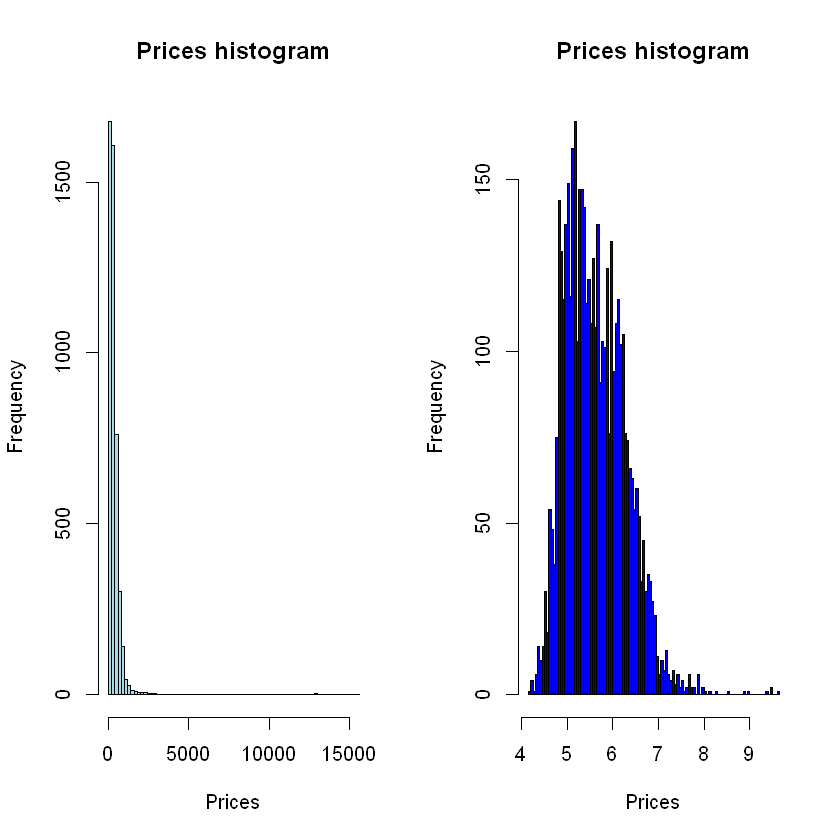

In [2]:
par(mfrow=c(1,2))

#Without log transform
price_weekday <- data_london_weekday$realSum
hist(price_weekday, col = "lightblue"
, xlab = "Prices"
, main = 'Prices histogram',breaks=100)

#With log transform
price_weekend <- log(data_london_weekday$realSum)
hist(price_weekend, col = "blue"
, xlab = "Prices"
, main = 'Prices histogram',breaks=100)

### Remove Outliers
Note that even after log transformation is applied, some outliers exist. Hence, remove outliers that that are outside the 1.5*IQR range

#### Function to find lower and upper quartiles to remove outliers

In [3]:
outlierData <- function(data){
    quartiles <- quantile(data, probs=c(.25, .75), na.rm = FALSE)    
    IQR <- IQR(data)
    Lower <- quartiles[1] - 1.5*IQR
    Upper <- quartiles[2] + 1.5*IQR 
    output <- list(Lower, Upper)
    return (output)}

In [4]:
#Get lower and upper quartile of price data
lowerUpperRange <- outlierData(log(data_london_weekday$realSum))
lowerUpperRange

[[1]]
     25% 
3.687202 

[[2]]
     75% 
7.509895

In [5]:
#Remove outliers from dataset
data_london_weekday_cleaned <- subset(data_london_weekday, 
                                      log(realSum) > lowerUpperRange[1] &
                                       log(realSum) < lowerUpperRange[2])

### Plot before and after removal of outliers

#### Histogram

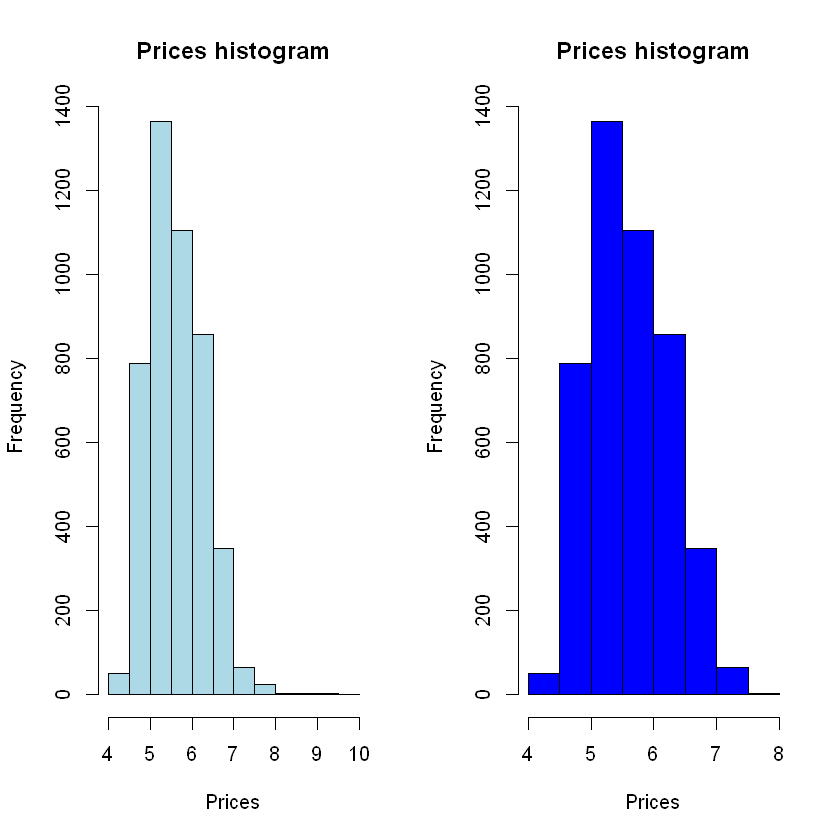

In [6]:
par(mfrow=c(1,2))
#With log transform 
price_weekday <- log(data_london_weekday$realSum)
hist(price_weekday, col = "lightblue"
, xlab = "Prices"
, main = 'Prices histogram',breaks=10)

#With log transform + remove outliers
price_weekend <- log(data_london_weekday_cleaned$realSum)
hist(price_weekend, col = "blue"
, xlab = "Prices"
, main = 'Prices histogram',breaks=10)

#### Boxplot

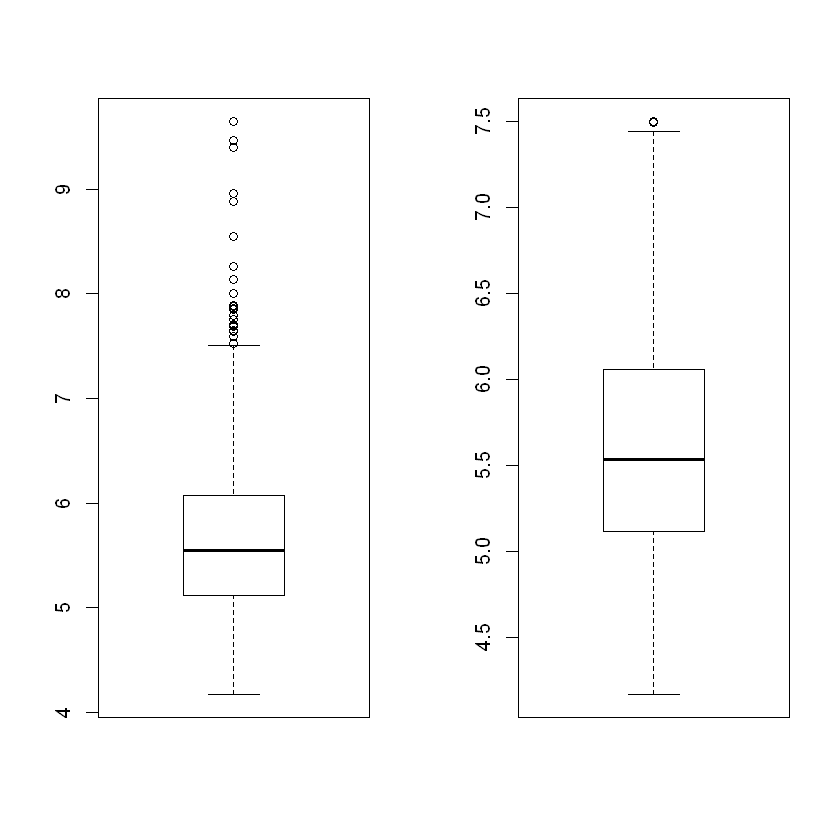

In [7]:
par(mfrow=c(1,2))
boxplot(log(data_london_weekday$realSum))
boxplot(log(data_london_weekday_cleaned$realSum))

### Write cleaned data to csv file

In [8]:
write.csv(data_london_weekday_cleaned, 'london_weekday_cleaned.csv', row.names=FALSE)